# Quiz \#3: Rendering Shapes

## Basic graphics in Python

This quiz uses the Python Imaging Library (PIL) to draw various shapes into images. In later exercises, these shapes are moved, rotated, and eventually made in "3D" (perspective projection). This is a great opportunity to learn the wonderful `numpy` library.

## Example output

Using my code from this quiz, I created some "spheres" and made them orbit (rotate) around the origin, here it's the sun. As you can see, the illusion of distance comes from growing and shrinking the circles.

![Solar system](./Images/orbit.gif)

## How to use this quiz

### On your computer

* Instructions: https://jupyter.org/install

If you have basic Python with pip, use `pip install jupyterlab` to install Jupyter lab. You can then download with `.ipynb` file to your computer, and then start `jupyter lab` to open it.

If you have Anaconda, you can install Jupyter with `conda install -c conda-forge jupyterlab`.

### With Google Colab

Google Colab is a free hosted Jupyter Notebook: https://colab.research.google.com/notebooks/welcome.ipynb

It allows you to open a Notebook from GitHub. Paste this Notebook's url into Colab to open it.

In Google Colab, you can update Python packages with pip, for example `pip install pandas --upgrade`.

In [1]:
# You are likely to use these libraries
from PIL import Image, ImageDraw
import numpy as np

In [2]:
# If you use the trick to display GIFs in Jupyter
from IPython.display import HTML

# Exercise 1: draw a square

Pillow is a a fork of PIL (Python Imaging Library). It lets you work with images in Python. You can use it to draw shapes onto a canvas, animate GIFs, and save images to file. It's like MSPaint or a mini-photoshop in your Python session.

* PIL documentation: https://pillow.readthedocs.io/en/stable/

We'll start with drawing basic shapes onto a canvas.

* Image class documentation: https://pillow.readthedocs.io/en/stable/reference/Image.html
* Draw module documentation: https://pillow.readthedocs.io/en/stable/reference/ImageDraw.html

When drawing shapes, remember that 0,0 is at the top left of the canvas.

**Goal: draw a rectangle, an ellipse, and an equilateral triangle.**

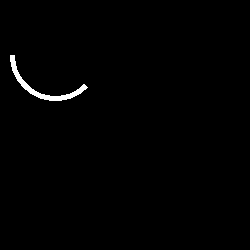

In [3]:
# Start a new blank canvas
image = Image.new("RGB", (250, 250))

# Use the draw object to draw objects
draw = ImageDraw.Draw(image)

# For example, here is an arc
draw.arc(xy=[(10, 10), (100, 100)],
         start=45,
         end=180,
         fill="white",
         width=5)

# In Jupyter, this will display the image
image

# Goal: draw the following:
#       a) a rectangle
#       b) an ellipse
#       c) an equilateral triangle

# Exercise 2: Draw a chessboard pattern

Using the Pillow library, draw a checkerboard pattern onto the canvas. The size, position, and color don't matter as long as it looks vaguely like a checkerboard pattern.

![Checkerboard](./Images/checkerboard.jpg)

## Hints

* The PIL library wants its inner coordinates in tuples, like this: `[(x1, y1), (x2, y2)]` In Python the round parentheses `( )` signify a tuple, the square brackets `[ ]` signify a list.
    * If you have a nested list like this `coords = [[x1, y1], [x2, y2]]` you can convert it like this `coords = [tuple(i) for i in coords]` which will give `[(x1, y1), (x2, y2)]`

**Goal: draw a checkerboard with PIL**

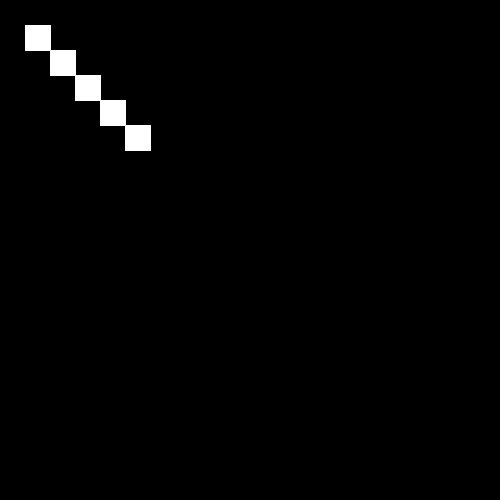

In [4]:
image = Image.new("RGB", (500, 500))
draw = ImageDraw.Draw(image)

# Here is a starter example
origin = np.array([25, 25])
for i in range(5):
    draw.rectangle(xy=[tuple(origin +     i*np.array([25, 25])),
                       tuple(origin + (i+1)*np.array([25, 25]))],
                  fill="white")

# In Jupyter, this will display the image
image

# Goal: draw a checkerboard pattern

# Exercise 3: Transform a square

Shapes can undergo several transformations:

  * Translation (movement)
  * Rotation
  * Stretching (scaling)
  * Shearing (slanting)
  * Reflection (flipping)

![Output](./Images/transformations.png)

Translation is easy to grasp, but the other transformations are a bit more complicated. Luckily, Wikipedia has them all:

* Transformation matrices: https://en.wikipedia.org/wiki/Transformation_matrix#Examples_in_2D_computer_graphics

Matrices are a convenient way of transforming coordinates. With the right matrix, you can morph your shapes the way you want to. In order to apply these, you use the np.dot() function in numpy to perform a dot product.

* A popular visual guide to linear transformations: https://www.youtube.com/watch?v=kYB8IZa5AuE
* Matrix multiplication: https://www.youtube.com/watch?v=XkY2DOUCWMU

## Hints

* All computer graphics stuff I've seen use coordinates in column/vertical format. To switch between formats, use the `.transpose()` method on your numpy array. Example: `np.array([[1, 2]]).transpose() --> array([[1], [2]])`
* The numpy documentation is very helpful.
* You can find a matrix's size and shape with its .shape property.
    * Example: `np.array([[1, 2]]).shape --> (2, 1)`
* If you add a smaller matrix to a larger one, numpy will try to broadcast the smaller one. For example, you can add (0, 1) to a matrix of (x, y) coordinates to add 1 to each y coordinate.
    * Here is a better explanation: https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html

**Goal: Given a square, translate it, rotate it, stretch it, shear it, and reflect it.**

# Exercise 4: Project a 3D checkerboard into 2D

In order to view a 3D object on your computer monitor, it has to be "squished" into 2D. Imaging painting a scene onto canvas: how do you paint objects to make them seem real? When painting, you need to transform the 3D scene in your mind to a 2D representation on the canvas. You can do this with perspective.

* Example of perspective: https://upload.wikimedia.org/wikipedia/commons/6/6b/One_point_perspective.jpg

The transformation from 3D to 2D is a projection. In particular, this one is known as the perspective projection, a projection that gives the illusion of depth. Other projections are the orthogonal projection (seen in design diagrams) and the Mercator projection (squish the Earth into a rectangular map).

* Information about 3D projections, including parallel projections: https://en.wikipedia.org/wiki/3D_projection
  * In particular, SimCity used a military projection. See how building height is handled? https://commons.wikimedia.org/wiki/File:SimCity-Indigo.gif
* Video animation demonstrating the Mercator projection: https://www.youtube.com/watch?v=CPQZ7NcQ6YQ

For this exercise, transform your 2D checkerboard into 3D, tilt it back, and perform the perspective projection. It should look like this:

![Checkered road](./Images/checker_road.jpg)

As you can see, the perspective projection shears shapes to give the sense of depth.

## Hints

* There is a ton of resources on this topic online. If you Google the OpenGL graphics library, you can find out how it does 3D rendering.
* 3D rendering is usually done in homogeneous coordinates, which are coordinates in $(x, y, z, w)$. The point $(x, y, z, w)$ becomes $(x/w, y/w, z/w)$ in Euclidean coordinates.

**Goal: render a 3D checkboard onto a 2D image**

# Bonus 1: Render a spinning cube

You can render a cube by rendering 6 square planes (polygons) together. This will work if these cube faces stay properly aligned with one another.

In order to render a solid cube properly, you will need to know which surface to render over which. Objects that are nearer should cover those that are further away.

* With multiple `Image` PIL objects, you can `.append` them into an animated GIF: https://pillow.readthedocs.io/en/stable/releasenotes/3.4.0.html#append-images-to-gif
* You can open GIFs to view them, or you can display GIFs in Jupyter using HTML: https://github.com/ipython/ipython/issues/10045

![Cube](./Images/cube.gif)

**Goal: render a spinning 3D cube**

# Bonus 2: Apply diffuse lighting on the cube faces        

Lighting is another concept in 3D graphics. Like perspective, it helps to add depth to an image.

Diffuse lighting is a kind of lighting where a surface gets brighter as it faces a light source more directly. For example, with a single light source in a room, the sides of objects facing the light are bright; however, the other sides of the objects remain dark and unlit.

In order to apply the diffuse lighting, you need to determine where each cube face is facing and adjust its color.

![Cube](./Images/diffuse.gif)

**Goal: render a spinning with some basic diffuse lighting**